In [4]:
# 나눔고딕 폰트 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire

In [5]:
import matplotlib.pyplot as plt

# 폰트 설정
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

ROC와 AUC 기본 개념 학습
실제 정답: [0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1]
예측 확률: [0.1  0.2  0.8  0.9  0.3  0.7  0.15 0.85 0.95 0.25 0.75 0.88 0.12 0.18
 0.82 0.05 0.78 0.92 0.08 0.87]

임계값별 성능 지표:
------------------------------------------------------------
임계값  | TPR(민감도) | FPR(1-특이도) | 정확도
------------------------------------------------------------
    0.3 |       1.000 |         0.111 |  0.950
    0.5 |       1.000 |         0.000 |  1.000
    0.7 |       1.000 |         0.000 |  1.000
    0.8 |       0.727 |         0.000 |  0.850


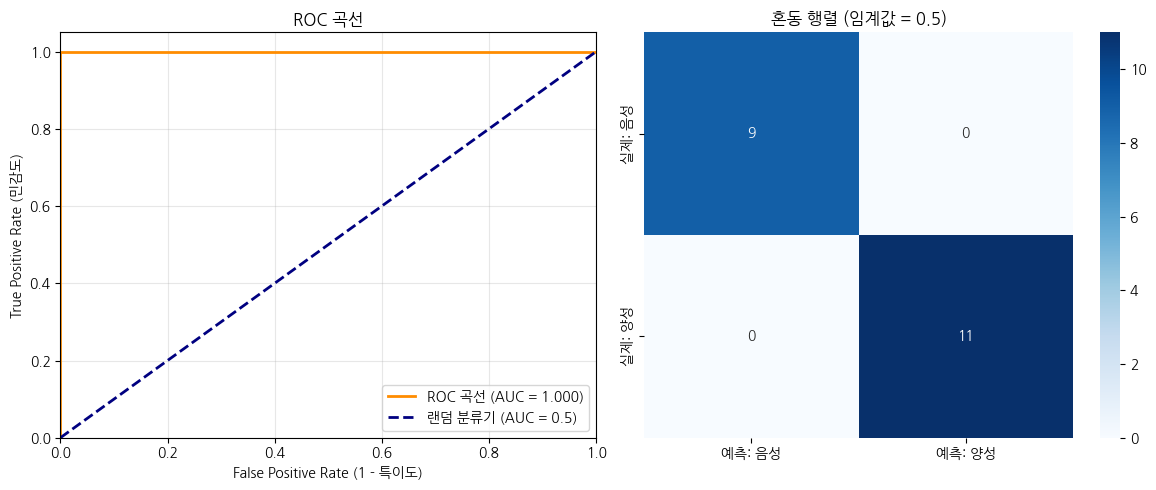


 AUC 점수: 1.000

 AUC 해석 가이드:
• AUC = 1.0: 완벽한 분류기
• AUC = 0.9 ~ 1.0: 매우 우수한 분류기
• AUC = 0.8 ~ 0.9: 우수한 분류기
• AUC = 0.7 ~ 0.8: 양호한 분류기
• AUC = 0.6 ~ 0.7: 보통 분류기
• AUC = 0.5: 랜덤 분류기 (동전 던지기)
• AUC < 0.5: 랜덤보다 못한 분류기

핵심 개념 정리
 ROC 곡선:
  - X축: FPR (False Positive Rate) = 1 - 특이도
  - Y축: TPR (True Positive Rate) = 민감도
  - 곡선이 왼쪽 위로 갈수록 좋은 성능

 AUC (Area Under the Curve):
  - ROC 곡선 아래 면적
  - 0.5 ~ 1.0 사이의 값
  - 클수록 좋은 성능
  - 임계값에 무관한 전체적인 성능 지표


In [6]:
# 예제 1: ROC와 AUC 기본
# ===================================

# 필요한 라이브러리 설치 및 임포트
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix
import seaborn as sns


print("=" * 50)
print("ROC와 AUC 기본 개념 학습")
print("=" * 50)

# 1. 가상의 이진 분류 결과 생성
np.random.seed(42)

# 실제 정답 레이블 (0: 음성, 1: 양성)
y_true = np.array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
                   1, 1, 0, 0, 1, 0, 1, 1, 0, 1])

# 모델의 예측 확률 (0~1 사이의 값)
y_scores = np.array([0.1, 0.2, 0.8, 0.9, 0.3, 0.7, 0.15, 0.85, 0.95, 0.25,
                     0.75, 0.88, 0.12, 0.18, 0.82, 0.05, 0.78, 0.92, 0.08, 0.87])

print(f"실제 정답: {y_true}")
print(f"예측 확률: {y_scores}")
print()

# 2. 다양한 임계값에서의 성능 지표 계산
print("임계값별 성능 지표:")
print("-" * 60)
print("임계값  | TPR(민감도) | FPR(1-특이도) | 정확도")
print("-" * 60)

thresholds = [0.3, 0.5, 0.7, 0.8]
for threshold in thresholds:
    # 예측 레이블 생성
    y_pred = (y_scores >= threshold).astype(int)

    # Confusion Matrix 계산
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # 성능 지표 계산
    tpr = tp / (tp + fn)  # True Positive Rate (민감도, Sensitivity)
    fpr = fp / (fp + tn)  # False Positive Rate (1 - 특이도)
    accuracy = (tp + tn) / (tp + tn + fp + fn)  # 정확도

    print(f"{threshold:7.1f} | {tpr:11.3f} | {fpr:13.3f} | {accuracy:6.3f}")

# 3. ROC 곡선 계산 및 그리기
fpr, tpr, thresholds_roc = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 5))

# ROC 곡선 그리기
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC 곡선 (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='랜덤 분류기 (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - 특이도)')
plt.ylabel('True Positive Rate (민감도)')
plt.title('ROC 곡선')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Confusion Matrix 시각화 (임계값 0.5 기준)
plt.subplot(1, 2, 2)
y_pred_05 = (y_scores >= 0.5).astype(int)
cm = confusion_matrix(y_true, y_pred_05)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['예측: 음성', '예측: 양성'],
            yticklabels=['실제: 음성', '실제: 양성'])
plt.title('혼동 행렬 (임계값 = 0.5)')

plt.tight_layout()
plt.show()

# 4. AUC 해석
print(f"\n AUC 점수: {roc_auc:.3f}")
print("\n AUC 해석 가이드:")
print("• AUC = 1.0: 완벽한 분류기")
print("• AUC = 0.9 ~ 1.0: 매우 우수한 분류기")
print("• AUC = 0.8 ~ 0.9: 우수한 분류기")
print("• AUC = 0.7 ~ 0.8: 양호한 분류기")
print("• AUC = 0.6 ~ 0.7: 보통 분류기")
print("• AUC = 0.5: 랜덤 분류기 (동전 던지기)")
print("• AUC < 0.5: 랜덤보다 못한 분류기")

# 5. 핵심 개념 정리
print("\n" + "=" * 50)
print("핵심 개념 정리")
print("=" * 50)
print(" ROC 곡선:")
print("  - X축: FPR (False Positive Rate) = 1 - 특이도")
print("  - Y축: TPR (True Positive Rate) = 민감도")
print("  - 곡선이 왼쪽 위로 갈수록 좋은 성능")
print()
print(" AUC (Area Under the Curve):")
print("  - ROC 곡선 아래 면적")
print("  - 0.5 ~ 1.0 사이의 값")
print("  - 클수록 좋은 성능")
print("  - 임계값에 무관한 전체적인 성능 지표")